# Domain Results and Documentation with LaTeX

In [1]:
from axisvm.com.client import start_AxisVM
axvm = start_AxisVM(visible=True, daemon=True)


In [2]:
import matplotlib.pyplot as plt
import numpy as np


In [3]:
from pylatex import (Section, Subsection, Command, NoEscape, Package,
                     NewPage, Tabular, NewLine, Math)
from latexdocs import Document, TikZFigure, Image, Text, float_to_str_sig
from functools import partial
from linkeddeepdict import DeepDict
from neumann.linalg.sparse.utils import count_cols
import axisvm.com.tlb as axtlb
from axisvm import examples
from axisvm.docs.utils import combination_to_str
import numpy as np
import matplotlib.pyplot as plt

f2str = partial(float_to_str_sig, sig=6)

doc = Document(author='Inter-CAD Kft.',
               title='AxisVM Report Generation Example', date=False)
doc.append(NoEscape(r'\maketitle'))
doc.append(NewPage())
doc.append(NoEscape(r'\tableofcontents'))
doc.append(NewPage())

axvm.model = examples.download_tetrahedra()
axm = axvm.Models[-1]
axm.Calculation.LinearAnalysis(axtlb.cuiNoUserInteractionWithAutoCorrectNoShow)


1

In [4]:
axm.Domains[1]


IAxisVMDomain,Information
Name,1
Index,1
UID,1
N Surfaces,121
Area,5.000e-01
Volume,5.000e-03
Weight,3.925e+01


In [5]:
table = Tabular('l|l')
table.add_row(('N Node', axm.Nodes.Count))
table.add_row(('N Line', axm.Lines.Count))
table.add_row(('N Surface', axm.Surfaces.Count))
table.add_row(('N Member', axm.Members.Count))
table.add_row(('N Domain', axm.Domains.Count))
doc['Model Information'].append(table)


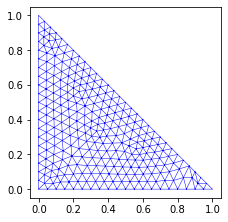

In [6]:
from matplotlib import gridspec

fig, ax = plt.subplots(figsize=(7.5, 3))
axm.Domains[1].plot(fig=fig, ax=ax)

plt.tight_layout(pad=0.4, w_pad=2.0, h_pad=2.0)
plt.savefig("axisvm_geom.pdf")

img = Image(filename="axisvm_geom.pdf", caption='Domain 1', w='full')
doc['Model Information', 'Domains'].append(img)


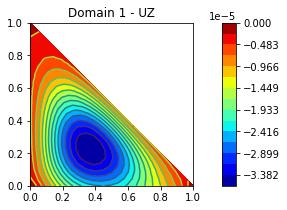

In [7]:
fig, ax = plt.subplots(figsize=(7.5, 3))
mpl_kw = dict(nlevels=15, cmap='jet', axis='on', offset=0., cbpad=0.4,
              cbsize=0.2, cbpos='right', fig=fig, ax=ax)
axm.Domains[1].plot_dof_solution(component='uz', mpl_kw=mpl_kw, case=3)

plt.savefig("axisvm_UZ.pdf")

img = Image(filename="axisvm_UZ.pdf", w='full',
            caption='Degree of Freedom Solution for Domain 1')
section = "Degree of freedom solution of a domain for a single load case."
doc['Results', 'ULS', section].append(img)


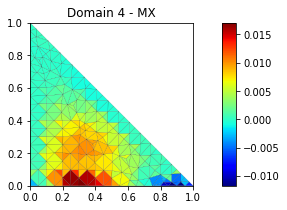

In [8]:
fig, ax = plt.subplots(figsize=(7.5, 3))
mpl_kw = dict(cmap='jet', axis='on', offset=0., cbpad=0.4,
              cbsize=0.2, cbpos='right', fig=fig, ax=ax)
axm.Domains[4].plot_forces(component='mx', mpl_kw=mpl_kw, case=3)


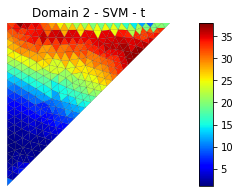

In [9]:
fig, ax = plt.subplots(figsize=(7.5, 3))
mpl_kw = dict(cmap='jet', axis='off', offset=0., cbpad=0.4,
              cbsize=0.2, cbpos='right', fig=fig, ax=ax)
axm.Domains[2].plot_stresses(component='svm', mpl_kw=mpl_kw, case=3, z='t')

plt.savefig("axisvm_svm.pdf")

img = Image(filename="axisvm_svm.pdf", w='full',
            caption='Von Mises Stresses for Domain 1')
section = "Von-Mises stress distribution of a domain for a single load case."
doc['Results', 'ULS', section].append(img)


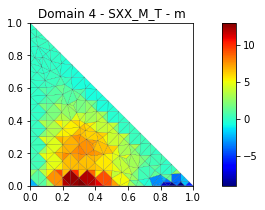

In [10]:
fig, ax = plt.subplots(figsize=(7.5, 3))
mpl_kw = dict(cmap='jet', axis='on', offset=0., cbpad=0.4,
              cbsize=0.2, cbpos='right', fig=fig, ax=ax)
axm.Domains[4].plot_stresses(case='LC1', component='sxx_m_t', mpl_kw=mpl_kw)


In [11]:
axm.Materials


IAxisVMMaterials,Information
N Materials,4


In [12]:
axm.Materials[1]


IAxisVMMaterial,Information
Name,S 235
NationalDesignName,Eurocode
MaterialDesignName,10025-2
MaterialType,Steel
UID,1


## XLAM

### Results for a single load case

In [13]:
txt = Text("Stresses of a domain for a single load case", bold=True)
doc['XLAM']['Stresses'].append(txt)


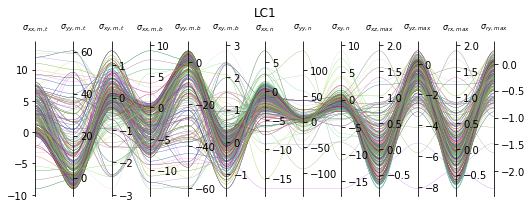

In [14]:
from axisvm.docs.utils import xlam_strs_labels, xlam_strs_tex_labels
from dewloosh.mpl import parallel

did = axm.Domains.get_xlam_domain_indices()[0]
stresses_dict = axm.Domains[did].xlam_surface_stresses(case='LC1', frmt='dict')

stresses = list(stresses_dict.values())
colors = np.random.rand(len(stresses[0]), 3)
parallel(stresses, labels=xlam_strs_tex_labels, padding=0.05,
         lw=0.2, colors=colors, title='LC1')
plt.tight_layout()
plt.savefig("parallel1.pdf")

img = Image(filename="parallel1.pdf", w='full',
            caption='Parallel coordinates plot about the stresses \
                of all the points of a domain.')
doc['XLAM']['Stresses'].append(img)


In [15]:
fm0k = 24000.0
fm90k = 500.0
ft0k = 14000.0
ft90k = 500.0
fc0k = 21000.0
fc90k = 2500.0
fvk = 2500.0
frk = 1000.0
fTk = 2500.0

kdef = 0.8
kmod = 0.7
ksys = 1.0
kfin = 1.0

gamma = 1.25


In [16]:
fm0d = fm0k * kmod * ksys * kfin / gamma
fm90d = fm90k * kmod * ksys / gamma
ft0d = ft0k * kmod * ksys / gamma
ft90d = ft90k * kmod * ksys / gamma
fc0d = fc0k * kmod / gamma
fc90d = fc90k * kmod / gamma
fvd = fvk * kmod / gamma
frd = frk * kmod / gamma
fTd = fTk * kmod / gamma


In [17]:
[sxx_m_T, syy_m_T, sxy_m_T, sxx_m_B, syy_m_B, sxy_m_B,
 sxx_n, syy_n, sxy_n, sxz_max, syz_max, srx_max, sry_max] = stresses


In [18]:
sxx_n / ft0d
np.abs(sxx_m_T), np.abs(sxx_m_B)


(array([2.22252503e-01, 2.77320266e-01, 1.32409051e-01, 2.75338758e-02,
        2.04864651e-01, 4.49217297e-02, 5.85689926e+00, 5.00213766e+00,
        7.01750708e+00, 5.42951822e+00, 6.00982237e+00, 6.43720341e+00,
        2.32601380e+00, 3.22214532e+00, 4.31843710e+00, 3.76789182e-01,
        9.46646631e-01, 3.77029133e+00, 2.34761310e+00, 9.74612296e-01,
        3.22214532e+00, 1.19639788e+01, 6.39640236e+00, 4.31843710e+00,
        7.59306192e+00, 9.18019009e+00, 5.35741949e+00, 3.77029133e+00,
        1.19639788e+01, 1.29854898e+01, 6.70615435e+00, 6.39640236e+00,
        1.24747353e+01, 9.84582233e+00, 6.55127859e+00, 9.18019009e+00,
        1.29854898e+01, 1.09682474e+01, 6.20525455e+00, 6.70615435e+00,
        1.19768696e+01, 8.58675003e+00, 6.45570469e+00, 9.84582233e+00,
        1.09682474e+01, 7.26559019e+00, 4.86115932e+00, 6.20525455e+00,
        9.11691856e+00, 6.06337404e+00, 5.53320694e+00, 8.58675003e+00,
        7.26559019e+00, 3.01677346e+00, 2.76631522e+00, 4.861159

In [19]:
axm.XLAMPanels.GetLayerThicknesses(1)
panelindex, toplayerdir, _ = axm.Domains.GetXLAMParameters(did)


### Critical combination for a node

In [20]:
txt = Text("Critical combinations for a single node of a domain", bold=True)
doc['XLAM']['Critical combinations'].append(txt)


In [21]:
from axisvm.docs.utils import combination_to_str

did = axm.Domains.get_xlam_domain_indices()[0]  # id of the first xlam domain
sid = axm.Domains[did].MeshSurfaceIds[0]  # id of the first surface
vid = axm.Domains[did].topology()[0, 0]  # id of the first node
params = dict(
    SurfaceVertexType=axtlb.svtContourPoint,
    SurfaceVertexId=vid,
    MinMaxType=axtlb.mtMax,
    CombinationType=11,
    AnalysisType=axtlb.atLinearStatic,
    Component=axtlb.xse_M_N_0,
    Efficiency=axtlb.RXLAMSurfaceEfficiencyValues()
)
data, factors, loadcases = \
    axm.Surfaces[sid].critical_xlam_efficiency(**params)

names = [axm.LoadCases.Name[i] for i in loadcases]
expr = combination_to_str(factors, names, tex=True, sig=4)
msg = "Ciritcal combination for Node {} of Surface {} of Domain {}"

doc['XLAM']['Critical combinations'].append(msg.format(vid, sid, did))
doc['XLAM']['Critical combinations'].append(NewLine())
doc['XLAM']['Critical combinations'].append(NoEscape(expr))
doc['XLAM']['Critical combinations'].append(NewLine())


### Critical combination for a domain

In [22]:
txt = Text("Critical combinations for a domain", bold=True)
doc['XLAM']['Critical combinations'].append(txt)


In [23]:
did = axm.Domains.get_xlam_domain_indices()[0]
factors, loadcases, (sid, nid) = \
    axm.Domains[did].critical_xlam_data(CombinationType=axtlb.ctULSALLab)


In [24]:
names = [axm.LoadCases.Name[i] for i in loadcases]
expr = combination_to_str(factors, names, tex=True, sig=4)
msg = "Ciritcal combination for Domain {}"

doc['XLAM']['Critical combinations'].append(msg.format(did))
doc['XLAM']['Critical combinations'].append(NewLine())
doc['XLAM']['Critical combinations'].append(NoEscape(expr))
doc['XLAM']['Critical combinations'].append(NewLine())


### Critical combination for all domains

In [25]:
txt = Text("Critical combinations for all domains", bold=True)
doc['XLAM']['Critical combinations'].append(txt)


In [26]:
factors, loadcases, (did, sid, nid) = \
    axm.critical_xlam_data(CombinationType=axtlb.ctULSALLab)
msg = "The combination resulting the highest maximum efficiency is"
doc['XLAM']['Critical combinations'].append(NewLine())
doc['XLAM']['Critical combinations'].append(NoEscape(msg))

names = [axm.LoadCases.Name[i] for i in loadcases]

# comb_tex = combination_to_str(factors, names, tex=True)  # for the documentation
"""doc['XLAM']['Critical combinations'].append(NewLine())
doc['XLAM']['Critical combinations'].append(Math(data=[NoEscape(comb_tex)]))
doc['XLAM']['Critical combinations'].append(NewLine())"""

comb_tex = combination_to_str(factors, names, tex=True, inline=False)
content = r"""
\begin{env} \centering{eq}
\end{env}  
""".format(env='{' + 'equation' + '}', eq='{' + comb_tex + '}')
doc['XLAM']['Critical combinations'].append(NewLine())
doc['XLAM']['Critical combinations'].append(NoEscape(content))
doc['XLAM']['Critical combinations'].append(NewLine())


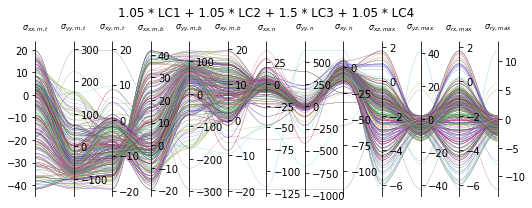

In [27]:
from axisvm.docs.utils import xlam_strs_tex_labels as texlabels

msg = "Surface stresses:"
doc['XLAM']['Critical combinations'].append(NewLine())
doc['XLAM']['Critical combinations'].append(NoEscape(msg))

# combination = 'cmin', 'cmax' or 'min', 'max', and 'upper', 'lower'
stresses_dict = axm.Domains[did].xlam_surface_stresses(
    case=loadcases, factor=factors, frmt='dict')
stresses = list(stresses_dict.values())

colors = np.random.rand(len(stresses[0]), 3)
comb_str = combination_to_str(factors, names)  # for the title of the plot
parallel(stresses, labels=texlabels, padding=0.05, lw=0.2,
         colors=colors, title=comb_str)
plt.tight_layout()
plt.savefig("parallel.pdf")

img = Image(filename="parallel.pdf", w='full',
            caption='Stresses of a domain.')
doc['XLAM']['Critical combinations'].append(img)


In [34]:
len(stresses), stresses[0].shape

(13, (454,))

In [28]:
msg = "Efficiancies:"
doc['XLAM']['Critical combinations'].append(NoEscape(msg))

axm.Domains[did].critical_xlam_surface_efficiencies(
    CombinationType=11,
    AnalysisType=axtlb.atLinearStatic,
    Component=axtlb.xse_M_N_0,
    MinMaxType=axtlb.mtMax,
    frmt='dict'
)


<Array [[[0.00363, 0.0102, ... 0.00505]]] type='58 * var * var * float64'>

In [29]:
"""msg = "Distribution of partial contributions among the different failure modes:"
doc['XLAM']['Critical combinations'].append(NewLine())
doc['XLAM']['Critical combinations'].append(NoEscape(msg))

xse_M_N_0, *_ = axm.Surfaces[sid].critical_xlam_efficiency(
    SurfaceVertexType=axtlb.svtContourPoint,
    SurfaceVertexId=vid, 
    MinMaxType=axtlb.mtMax, 
    CombinationType=11,
    AnalysisType=axtlb.atLinearStatic, 
    Component=axtlb.xse_M_N_0,
)"""


'msg = "Distribution of partial contributions among the different failure modes:"\ndoc[\'XLAM\'][\'Critical combinations\'].append(NewLine())\ndoc[\'XLAM\'][\'Critical combinations\'].append(NoEscape(msg))\n\nxse_M_N_0, *_ = axm.Surfaces[sid].critical_xlam_efficiency(\n    SurfaceVertexType=axtlb.svtContourPoint,\n    SurfaceVertexId=vid, \n    MinMaxType=axtlb.mtMax, \n    CombinationType=11,\n    AnalysisType=axtlb.atLinearStatic, \n    Component=axtlb.xse_M_N_0,\n)'

In [30]:

strs = axm.Surfaces[sid].xlam_stresses(
    case=loadcases, factor=factors, frmt='dict'
)


In [31]:
[axm.LoadCases.LoadDurationClass[c] for c in loadcases]


[2, 2, 2, 2]

In [32]:
doc.build().generate_pdf('axisvm_cookbook', clean_tex=True, compiler='pdflatex')
